# Project 02 - Image Processing

## Student Information

- Full name: Trần Ngọc Uyển Nhi
- Student ID: 22127313
- Class: 22CLC10

## Required Libraries

In [10]:
# IMPORT YOUR LIBS HERE
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

## Function Definitions

In [11]:
def read_img(img_path):
    '''
    Read image from img_path

    Parameters
    ----------
    img_path : str
        Path of image

    Returns
    -------
        Image
    '''

    # YOUR CODE HERE
    image = Image.open(img_path)
    return np.array(image)


def show_img(img):
    '''
    Show image

    Parameters
    ----------
    img : ndarray
        Image
    '''

    # YOUR CODE HERE
    plt.figure()
    plt.imshow(img)


def save_img(img, img_file_name):
    '''
    Save image to img_file_name

    Parameters
    ----------
    img : ndarray
        Image
    img_file_name : str
        Path of image file
    '''
    
    # YOUR CODE HERE
    img_pil = Image.fromarray(img)
    img_pil.save(img_file_name)

def fix_image_path(original_name, auxiliary):
    dot_index = original_name.rfind('.')

    base_name = original_name[:dot_index]
    ext = original_name[dot_index:]
    
    new_name = f"{base_name}_{auxiliary}{ext}"
    
    return new_name

#--------------------------------------------------------------------------------
# YOUR FUNCTIONS HERE
def adjust_brightness(img_2d, beta):
    '''
    Adjust the brightness of the image by adding a constant value to all pixels.

    Parameters
    ----------
    img_2d : numpy.ndarray
        3D array representing the image with shape (height, width, channels).
    beta : float
        Value to be added to each pixel for brightness adjustment.

    Returns
    -------
    img_2d : numpy.ndarray
        3D array of the brightness-adjusted image with shape (height, width, channels).
    '''
    img_2d = img_2d.astype('float')
    img_2d = img_2d + beta
    img_2d = np.clip(img_2d, 0, 255).astype(np.uint8)
    return img_2d

def adjust_contrast(img_2d, alpha): 
    '''
    Adjust the contrast of the image by multiplying all pixels by a constant value.

    Parameters
    ----------
    img_2d : numpy.ndarray
        3D array representing the image with shape (height, width, channels).
    alpha : float
        Value to multiply each pixel for contrast adjustment.

    Returns
    -------
    img_2d : numpy.ndarray
        3D array of the contrast-adjusted image with shape (height, width, channels).
    '''
    img_2d = img_2d.astype('float')
    img_2d = img_2d * alpha
    img_2d = np.clip(img_2d, 0, 255).astype(np.uint8)
    return img_2d

def flip(img_2d, direction):
    '''
    Flip the image horizontally or vertically.

    Parameters
    ----------
    img_2d : numpy.ndarray
        3D array representing the image with shape (height, width, channels).
    direction : str
        Direction to flip the image: "horizontal" or "vertical".

    Returns
    -------
    img_2d : numpy.ndarray
        3D array of the flipped image with shape (height, width, channels).
    '''
    if direction == "horizontal":
        return np.fliplr(img_2d)
    if direction == "vertical":
        return np.flipud(img_2d)
    
def to_grayscale(img_2d):
    '''
    Convert the image to grayscale using a weighted sum of the RGB channels.

    Parameters
    ----------
    img_2d : numpy.ndarray
        3D array representing the image with shape (height, width, channels).

    Returns
    -------
    new_img_2d : numpy.ndarray
        3D array of the grayscale image with shape (height, width, channels).
    '''
    img_2d = img_2d.astype('float')
    red, green, blue = img_2d[:, :, 0], img_2d[:, :, 1], img_2d[:, :, 2]
    new_color = 0.2989 * red + 0.5870 * green + 0.1140 * blue
    
    new_img_2d = np.stack((new_color, new_color, new_color), axis=-1)
    new_img_2d = np.clip(new_img_2d, 0, 255).astype(np.uint8)
    return new_img_2d

def to_sepia(img_2d):
    '''
    Apply sepia filter to the image.

    Parameters
    ----------
    img_2d : numpy.ndarray
        3D array representing the image with shape (height, width, channels).

    Returns
    -------
    numpy.ndarray
        3D array of the sepia-toned image with shape (height, width, channels).
    '''
    img_2d = img_2d.astype('float')
    red, green, blue = img_2d[:, :, 0], img_2d[:, :, 1], img_2d[:, :, 2]
    newRed = ((red * 0.393) + (green * 0.769) + (blue * 0.189))
    newGreen = ((red * 0.349) + (green * 0.686) + (blue * 0.168))
    newBlue = ((red * 0.272) + (green * 0.534) + (blue * 0.131))

    new_img_2d = np.stack((newRed, newGreen, newBlue), axis=2)
    new_img_2d = np.clip(new_img_2d, 0, 255).astype(np.uint8)
    return new_img_2d

def convolve2d(image, kernel):
    '''
    Apply 2D convolution to the image using a fixed kernel.

    Parameters
    ----------
    image : numpy.ndarray
        3D array representing the image with shape (height, width, channels).
    kernel : numpy.ndarray
        2D array representing the convolution kernel.

    Returns
    -------
    result : numpy.ndarray
        3D array of the convolved image with shape (height, width, channels).
    '''
    # Get the size of the image and the kernel
    image_height, image_width, channels = image.shape
    kernel_height, kernel_width = kernel.shape

    # Calculate padding sizes
    pad_height = kernel_height // 2
    pad_width = kernel_width // 2

    # Pad the image with zeros on all sides
    padded_image = np.pad(image, ((pad_height, pad_height), (pad_width, pad_width), (0, 0)), mode='constant')

    shape = (image_height, image_width, kernel_height, kernel_width, channels)
    strides = padded_image.strides[:2] + padded_image.strides[:2] + padded_image.strides[2:]
    sliding_windows = np.lib.stride_tricks.as_strided(padded_image, shape=shape, strides=strides)

    result = np.tensordot(sliding_windows, kernel, axes=((2, 3), (0, 1)))

    return result

def blur_img(img_2d):
    '''
    Apply a blur filter to the image using a 3x3 averaging kernel.

    Parameters
    ----------
    img_2d : numpy.ndarray
        3D array representing the image with shape (height, width, channels).

    Returns
    -------
    new_img_2d : numpy.ndarray
        3D array of the blurred image with shape (height, width, channels).

    Notes
    -----
    The blur is achieved using a simple averaging filter.
    '''
    img_2d = img_2d.astype('float')
    #Box Blur
    # kernel = np.array([[1, 1, 1],
    #                 [1, 1, 1],
    #                 [1, 1, 1]]) / 9
    
    #Gaussian Blur
    kernel = np.array([[1, 4, 6, 4, 1],
                        [4, 16, 24, 16, 4],
                        [6, 24, 36, 24, 6],
                        [4, 16, 24, 16, 4],
                        [1, 4, 6, 4, 1]
                    ]) / 256

    new_img_2d = convolve2d(img_2d, kernel)
    new_img_2d = np.clip(new_img_2d, 0, 255).astype(np.uint8)
    return new_img_2d

def sharpen_img(img_2d):
    '''
    Apply a sharpening filter to the image using a 3x3 sharpening kernel.

    Parameters
    ----------
    img_2d : numpy.ndarray
        3D array representing the image with shape (height, width, channels).

    Returns
    -------
    new_img_2d : numpy.ndarray
        3D array of the sharpened image with shape (height, width, channels).

    Notes
    -----
    The sharpening is achieved using a kernel that enhances edges.
    '''
    img_2d = img_2d.astype('float')
    #Sharpen
    kernel = np.array([[0, -1, 0],
                    [-1, 5, -1],
                    [0, -1, 0]]) 
    
    new_img_2d = convolve2d(img_2d, kernel)
    new_img_2d = np.clip(new_img_2d, 0, 255).astype(np.uint8)
    return new_img_2d

def crop_img(img_2d, size):
    '''
    Crop central part of the image.

    Parameters
    ----------
    img_2d : numpy.ndarray
        3D array representing the image with shape (height, width, channels).
    size : a tuple 
        Height and Width of the cropped area.

    Returns
    -------
    new_img_2d : numpy.ndarray
        Cropped image with the specified height and width.

    Raises
    ------
    ValueError
        If the specified crop size is larger than the original image size.
    '''
    height, width = size
    if img_2d.shape[0] < height or img_2d.shape[1] < width:
        raise ValueError("The crop size should not pass original image size!")
    
    height_start = int(img_2d.shape[0] / 2 - height / 2)
    height_end = int(img_2d.shape[0] / 2 + height / 2)
    width_start = int(img_2d.shape[1] / 2 - width / 2)
    width_end = int(img_2d.shape[1] / 2 + width / 2)
    return img_2d[height_start:height_end, width_start:width_end]

def circular_mask(img_2d):
    '''
    Create a circular mask for a square image, keeping only the pixels inside the circle.

    Parameters
    ----------
    img_2d : numpy.ndarray
        3D array representing the image with shape (height, width, channels). The image must be square.

    Returns
    -------
    new_img_2d : numpy.ndarray
        Image with the circular mask applied, where pixels outside the circle are set to 0.
    
    Raises
    ------
    ValueError
        If the input image is not square.
    '''
    if img_2d.shape[0] != img_2d.shape[1]:
        raise ValueError("The input image must be a square!")
    
    height, width, _ = img_2d.shape
    center = (width // 2, height // 2)
    radius = min(center[0], center[1], width - center[0], height - center[1])
    
    X, Y = np.ogrid[:width, :height]
    dist_from_center = np.sqrt((X - center[0])**2 + (Y - center[1])**2)
    
    mask = dist_from_center <= radius
    new_img_2d = img_2d.copy()
    new_img_2d[~mask] = 0
    return new_img_2d

def ellipse_mask(img_2d):
    '''
    Create an elliptical mask for a square image with two ellipses rotated at 45 degrees.

    Parameters
    ----------
    img_2d : numpy.ndarray
        3D array representing the image with shape (height, width, channels). The image must be square.

    Returns
    -------
    new_img_2d : numpy.ndarray
        Image with the elliptical mask applied, where pixels outside the ellipses are set to 0 (black color).
    
    Raises
    ------
    ValueError
        If the input image is not square.
    '''
    if img_2d.shape[0] != img_2d.shape[1]:
        raise ValueError("The input image must be a square!")
    
    height, width, _ = img_2d.shape
    center = (width // 2, height // 2)
    
    a = 1.75 * height / np.sqrt(8.125) #Main axis
    b = height / np.sqrt(8.125) #Minor axis
    
    X, Y = np.ogrid[:width, :height]
    
    xe1 = X - center[0]
    ye1 = Y - center[1]
    ellipse_mask1 = (((xe1 * np.cos(-np.pi/4) - ye1 * np.sin(-np.pi/4))**2 / a**2) + 
                    ((xe1 * np.sin(-np.pi/4) + ye1 * np.cos(-np.pi/4))**2 / b**2)) <= 1
    
    xe2 = X - center[0]
    ye2 = Y - center[1]
    ellipse_mask2 = (((xe2 * np.cos(np.pi/4) - ye2 * np.sin(np.pi/4))**2 / a**2) + 
                    ((xe2 * np.sin(np.pi/4) + ye2 * np.cos(np.pi/4))**2 / b**2)) <= 1

    new_img_2d = img_2d.copy()
    new_img_2d[~(ellipse_mask1 | ellipse_mask2)] = 0
    return new_img_2d

def zoom_image(img_2d, zoom):
    '''
    Zoom in or out of the image based on the provided zoom factor.

    Parameters
    ----------
    img_2d : numpy.ndarray
    zoom : float
        Zoom factor. Values > 1 for zooming in, values < 1 for zooming out.

    Returns
    -------
    new_img_2d : numpy.ndarray
        Zoomed image with shape (output_height, output_width, channels),
        where output_height and output_width are determined by the zoom factor.
    '''
    height, width, channels = img_2d.shape

    if zoom < 1:  # Phóng nhỏ ảnh
        output_height = int(height * zoom)
        output_width = int(width * zoom)
        if height % 2 != 0:
            img_2d = img_2d[:-1, :, :]
            height -= 1
        if width % 2 != 0:
            img_2d = img_2d[:, :-1, :]
            width -= 1
        new_img_2d = img_2d.reshape((output_height, height // output_height, 
                                    output_width, width // output_width, channels)).mean(3).mean(1)
    else:  # Phóng to ảnh
        new_img_2d = np.repeat(np.repeat(img_2d, zoom, axis=0), zoom, axis=1)

    new_img_2d = np.clip(new_img_2d, 0, 255).astype(np.uint8)
    return new_img_2d

<ins>Note:</ins> For clarity, include docstrings with each function.

## Your tests

In [31]:
# YOUR CODE HERE
img_name = "taylor.jpg"
img = read_img(img_name)
#print(img)
after = sharpen_img(img)
show_img(img)
show_img(after)

TypeError: sharpen_img() takes 1 positional argument but 2 were given

## Main FUNCTION

In [12]:
# YOUR CODE HERE
def main():
    name_image = input("Enter image name: ") #'file_name.jpg'
    image = Image.open(name_image)
    image = np.array(image)
 
    print("""Choose desired modes: 
    0 - Execute all modes
    1 - Adjust brightness
    2 - Adjust contrast
    3 - Flip image (vertical or horizontal)
    4 - Convert image (grayscale or sepia)
    5 - Kernel image-processing (blur or sharpen) 
    6 - Crop image 
    7 - Mask image (circular or ellipse)
    8 - Zoom image (zoom in or zoom out)
    """)
    mode = input("Enter your choice: ")
    if mode == '0':
        brightness_factor = float(input("Enter brightness adjustment amount: "))
        contrast_factor = float(input("Enter contrast adjustment amount: "))
        crop_height = int(input("Enter the height for cropping: "))
        crop_width = int(input("Enter the width for cropping: "))
        
        # Tự động lưu và show ảnh
        functions = [
            ('brightness', adjust_brightness, brightness_factor),
            ('contrast', adjust_contrast, contrast_factor),
            ('flip_horizontal', flip, "horizontal"),
            ('flip_vertical', flip, "vertical"),
            ('grayscale', to_grayscale, None),
            ('sepia', to_sepia, None),
            ('blur', blur_img, None),
            ('sharpen', sharpen_img, None),
            ('crop', crop_img, (crop_height, crop_width)),
            ('circular_mask', circular_mask, None),
            ('ellipse_mask', ellipse_mask, None),
            ('zoom_out', zoom_image, 0.5),
            ('zoom_in', zoom_image, 2)
        ]

        for fixname, func, param in functions:
            if param is not None:
                new_image = func(image, param)
            else:
                new_image = func(image)
            
            show_img(new_image)
            save_img(new_image, fix_image_path(name_image, fixname))
        
    elif mode == "1":
        amount = float(input("Enter brightness adjustment amount: "))
        new_image = adjust_brightness(image, amount)
        show_img(image)
        show_img(new_image)
        save_img(new_image, fix_image_path(name_image, "brightness"))
        
    elif mode == "2":
        amount = float(input("Enter contrast adjustment amount: "))
        new_image = adjust_contrast(image, amount)
        show_img(image)
        show_img(new_image)
        save_img(new_image, fix_image_path(name_image, "contrast"))
        
    elif mode == "3":
        print("1 - Flip horizontally / 2 - Flip vertically")
        flip_mode = int(input("Enter flip mode: "))
        if flip_mode == 1:
            new_image = flip(image, "horizontal")
            save_img(new_image, fix_image_path(name_image, "flip_horizontal"))
        elif flip_mode == 2:
            new_image = flip(image, "vertical")
            save_img(new_image, fix_image_path(name_image, "flip_vertical"))
        else: 
            print("\n Invalid choice. Please try again!")
            return
        show_img(image)
        show_img(new_image)
        
    elif mode == "4":
        print("1 - Convert to Grayscale / 2 - Convert to Sepia")
        convert_mode = int(input("Enter mode: "))
        if convert_mode == 1:
            new_image = to_grayscale(image)
            save_img(new_image, fix_image_path(name_image, "grayscale"))
        elif convert_mode == 2:
            new_image = to_sepia(image)
            save_img(new_image, fix_image_path(name_image, "sepia"))
        else: 
            print("\n Invalid choice. Please try again!")
            return
        show_img(image)
        show_img(new_image)
             
    elif mode == "5":
        print("1 - Blur Image / 2 - Sharpen Image")
        img_mode = int(input("Enter mode: "))
        if img_mode == 1:
            new_image = blur_img(image)
            save_img(new_image, fix_image_path(name_image, "blur"))
        elif img_mode == 2:
            new_image = sharpen_img(image)
            save_img(new_image, fix_image_path(name_image, "sharpen"))
        else: 
            print("\n Invalid choice. Please try again!")
            return
        show_img(image)
        show_img(new_image)
            
    elif mode == "6":
        height = int(input("Enter the height for cropping: "))
        width = int(input("Enter the width for cropping: "))
        new_image = crop_img(image, (height, width))
        show_img(image)
        show_img(new_image)
        save_img(new_image, fix_image_path(name_image, "crop"))
              
    elif mode == "7":
        print("1 - Apply circular mask / 2 - Apply ellipse mask")
        mask_mode = int(input("Enter mask mode: "))
        if mask_mode == 1:
            new_image = circular_mask(image)
            save_img(new_image, fix_image_path(name_image, "circular_mask"))
        elif mask_mode == 2:
            new_image = ellipse_mask(image)
            save_img(new_image, fix_image_path(name_image, "ellipse_mask"))
        else:
            print("\nInvalid choice. Please try again!")
            return
        show_img(image)
        show_img(new_image)
        
    elif mode == "8":
        print("1 - Zoom in 2x / 2 - Zoom out 2x")
        zoom_choice = int(input("Enter zoom choice: "))
        if zoom_choice == 1:
            zoom_factor = 2
            new_image = zoom_image(image, zoom_factor)
            save_img(new_image, fix_image_path(name_image, "zoom_in"))
        elif zoom_choice == 2:
            zoom_factor = 0.5
            new_image = zoom_image(image, zoom_factor)
            save_img(new_image, fix_image_path(name_image, "zoom_out"))
        else:
            print("\nInvalid choice. Please try again!")
            return
        show_img(image)
        show_img(new_image)
            
    else:
        print("\n Invalid choice. Please try again!")
        return
    return


Choose desired modes: 
    0 - Execute all modes
    1 - Adjust brightness
    2 - Adjust contrast
    3 - Flip image (vertical or horizontal)
    4 - Convert image (grayscale or sepia)
    5 - Kernel image-processing (blur or sharpen) 
    6 - Crop image 
    7 - Mask image (circular or ellipse)
    8 - Zoom image (zoom in or zoom out)
    


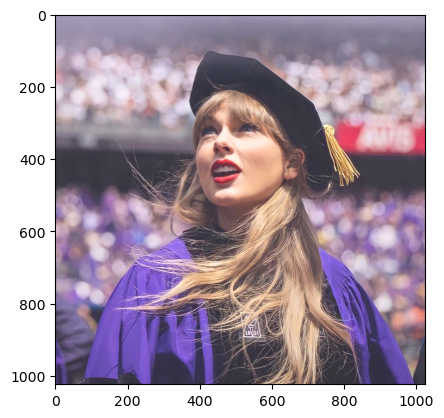

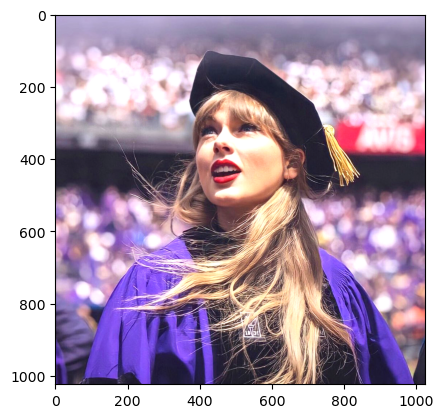

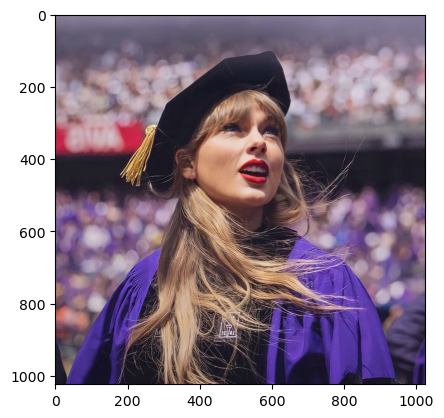

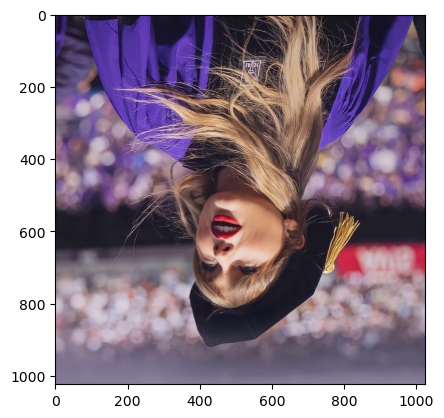

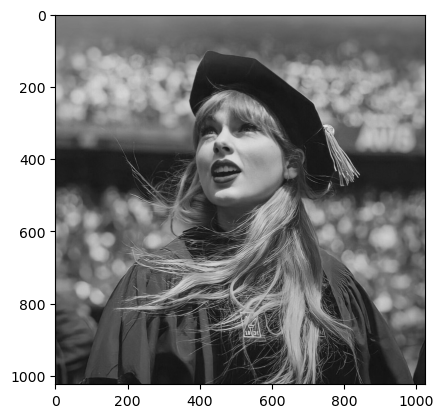

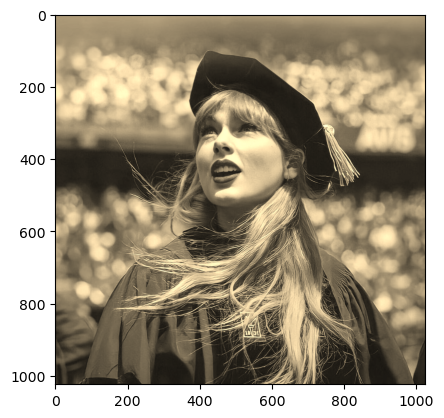

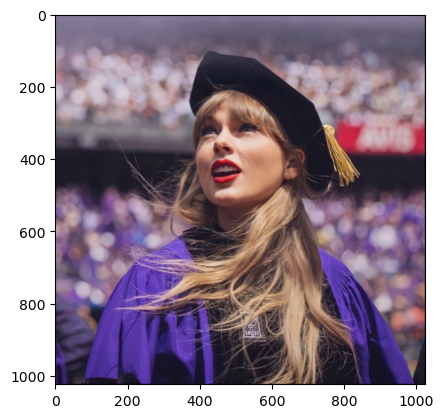

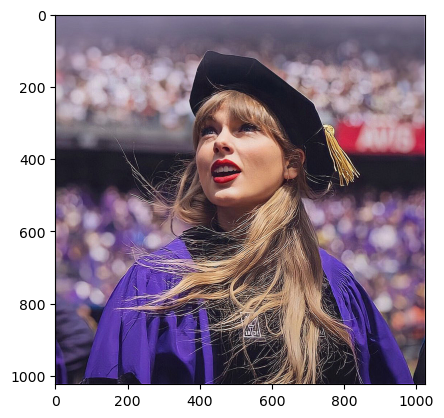

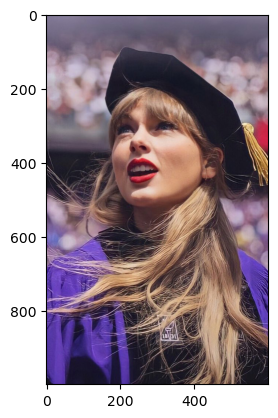

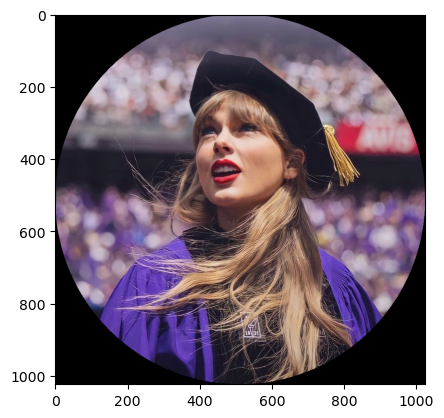

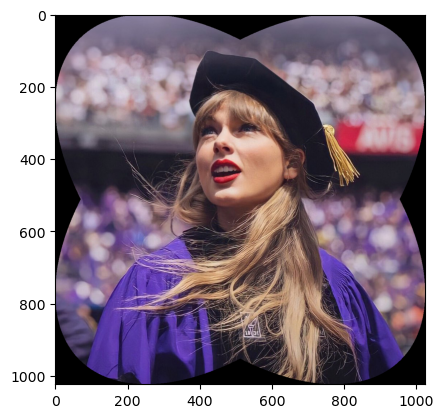

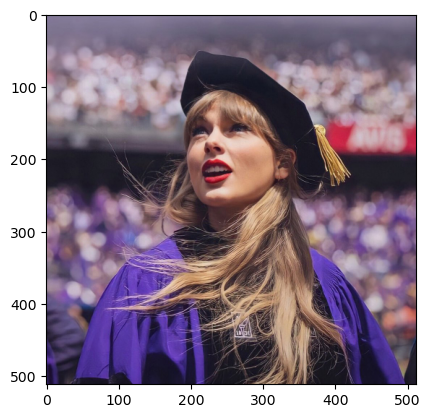

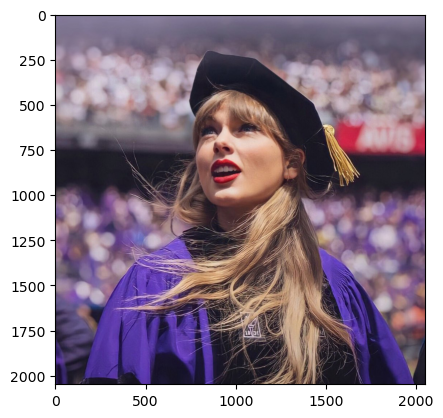

In [30]:
# Call main function
if __name__ == '__main__':
    main()